<h1> Проверка гипотез по увеличению выручки в интернет-магазине<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Кумулятивная-конверсия-по-группам" data-toc-modified-id="Кумулятивная-конверсия-по-группам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Кумулятивная конверсия по группам</a></span></li><li><span><a href="#Анализ-выбросов-:-крайние-значения-данных" data-toc-modified-id="Анализ-выбросов-:-крайние-значения-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ выбросов : крайние значения данных</a></span></li><li><span><a href="#Анализ-статистической-значимоси-различий-показателей-по-неочищенным-данным." data-toc-modified-id="Анализ-статистической-значимоси-различий-показателей-по-неочищенным-данным.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ статистической значимоси различий показателей по неочищенным данным.</a></span></li><li><span><a href="#Анализ-статистической-значимоси-различий-показателей-по-очищенным-данным." data-toc-modified-id="Анализ-статистической-значимоси-различий-показателей-по-очищенным-данным.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ статистической значимоси различий показателей по очищенным данным.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Описание проекта

Отдел аналитики вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустите A/B-тест и проанализировать результаты.

## Изучение данных 

In [1]:
# импорт библиотек 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st 
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
# настроим вывод таблиц так, чтобы содержимое строки отображолось полностью
pd.set_option('display.max_colwidth', None)
# прочитаем датасеты и сохраним в переменные 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Согласно документации к данным:
Таблица hypothesis содержит:
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
Таблица orders содержит: 
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.

Таблица visitors содержит:
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Изучим таблицу с гипотезами.

In [3]:
# выведем таблицу
display(hypothesis)
# получение общей информации о данных датасета
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Изучим таблицу с информацией о заказах пользователей.

In [4]:
# выведем первые 5 строк таблицы
display(orders.head())
# получение общей информации о данных датасета
orders.info()
#получим статистическую информацию о данных
orders.describe()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [5]:
# посмотрим на уникальные значения каналов привлечения датасета orders
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [6]:
# посморим границы периода, за который предоставлена информация
orders['date'].agg(['max','min'])

max    2019-08-31
min    2019-08-01
Name: date, dtype: object

Изучим таблицу с информацией о количестве пользователей в указанную дату в указанной группе A/B-теста.

In [7]:
# выведем первые 5 строк таблицы
display(visitors.head())
# получение общей информации о данных датасета
visitors.info()
#получим статистическую информацию о данных
visitors.describe()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [8]:
# посмотрим на уникальные значения каналов привлечения датасета visits
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [9]:
# посморим границы периода, за который предоставлена информация
visitors['date'].agg(['max','min'])

max    2019-08-31
min    2019-08-01
Name: date, dtype: object

Длительность отчетного периода таблиц visitors и orders совпадает.


Просматривая статистическую информацию  и уникальные значения текстовых столбцов в данных не обнаружено значений, не соответствующих действительности и неявных дубликатов.

Пропусков в датасетах не выявлено.

Для удобства работы с данными, а также в качестве общепринятого стандарта  необходимо перевести  наименования столбцов датасета hypothesis к нижнему регистру.

Также необходимо переименовать столбцы датасета orders для соблюдения правила змеиного регистра.

Для дальнейшей корректной работы с данными необходимо изменить тип данных столбцов date таблиц orders и visitors с object на datetime.

А также проверить данные датасетов orders и visitors на явные дубликаты.



##  Предобработка данных

Приведем наименование столбцов датасетов hypothesis и orders к общепринятым стандартам.

In [10]:
# приведем названия столбцев hypothesis к нижнему регистру
hypothesis = hypothesis.rename(str.lower, axis='columns')

In [11]:
# приведем название столбцев orders к змеиному регистру 
orders = orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id' })

Изменим тип данных столбцов date таблиц orders и visitors с object на datetime. 


In [12]:
# приведение к datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим датасеты на явные дубликаты.

In [13]:
print(orders.duplicated().sum())

0


In [14]:
print(visitors.duplicated().sum())

0


In [15]:
#проверим типы данных
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Явных дубликатов в датасетах orders и visitors не обнаружено.

## Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [16]:
# посчитаем ICE для каждой гипотезы
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by='ice',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Согласно фреймворку ICE  наиболее перспективные гипотезы - 8,0,7

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [17]:
# посчитаем RICE для каждой гипотезы
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by='rice',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Согласно фреймворку RICE  наиболее перспективные гипотезы - 7,2,0,6.

Гипотеза под номером 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") согласно ICE занимала третье место по приоритетности, но согласно RICE занимает уже 1 место , так как  имеет наибольший охват пользователей среди всех гипотез и высокие уровень влияния и уверенности в оценках других параметров.

После приоритизация по RICE гипотеза за номером 2 переместилась с 5-го места на второе,так как несмотря на небольшое влияние на пользователей, степень охвата пользователей высокая .

И по ICE и по RICE в тройку лидеров входит гипотеза под номером 0 ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"),но  за счет низкого охвата пользователей после приоритизеции по RICE вместо второго места занимает 3.

## Анализ A/B-теста

Проанализируем A/B-тест.

Проверим есть ли пользователи , которые попали и в группу A и в группу B , так как наличие уникальных пользователей внутри каждой из групп одно из условий корректного А/В теста.

In [18]:
# создадим список уникальных значений visitor_id группы  А
list_a = orders.query('group=="A"')['visitor_id'].unique()
# создадим список уникальных значений visitor_id, входящих и в группу А и в В
list_all = orders[(orders['visitor_id'].isin(list_a))&(orders['group'] == "B")]['visitor_id']
# удалим задублировавшихся пользователей
orders = orders[~orders['visitor_id'].isin(list_all)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


В таблице  с заказами пользователей есть клиенты, которые входят и в группу А и в группу В. Для клиентов , которые видели оба варианта , невозможно точно определить какой из вариантов теста оказал влияние на их поведение , поэтому датасет был очищен от таких пользователей.

### Кумулятивная выручка по группам

Построим график кумулятивной выручки по группам. 

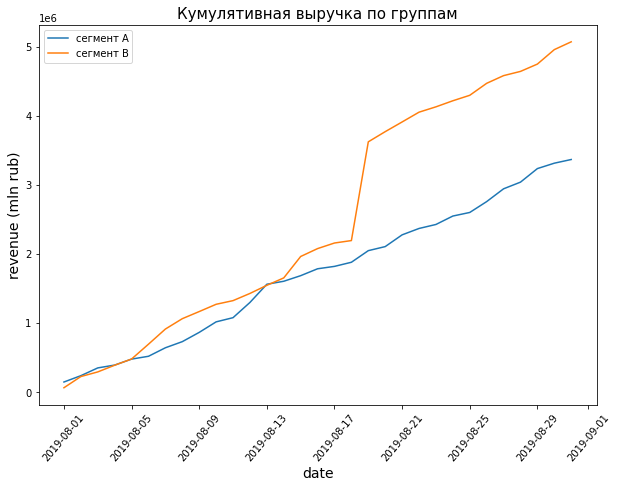

        date  revenue  orders
8 2019-08-05   474413      99


In [19]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge( visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = [
                            'date',
                            'group',
                            'orders',
                            'buyers',
                            'revenue',
                            'visitors',
                            ]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.figure(figsize=(10, 7))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue'], label = 'сегмент A' )
# Строим график выручки группы В
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue'], label = 'сегмент B')
plt.xlabel('date',fontsize=14)
plt.ylabel('revenue (mln rub)',fontsize=14)
plt.legend()
plt.xticks(rotation=50)
plt.title('Кумулятивная выручка по группам',fontsize=15)
plt.show()
print(cumulative_revenue_a[cumulative_revenue_a['date'] == '2019-08-05'])

В начале проведения теста кумулятивная выручка каждой из групп колебалась вокруг одинаковых значений. Затем выручка сегмента В превысила выручку сегмента А.

На графике видны единичные точки, в которых выручка сегмента В резко выросла , что похоже на влияние отдельных выбросов.До этого момента расхождение между сегментами было не таким значительным. Возможно в группу В попало несколько крупных заказов.

### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам и относительное изменение кумулятивного среднего чека группы B к группе A.

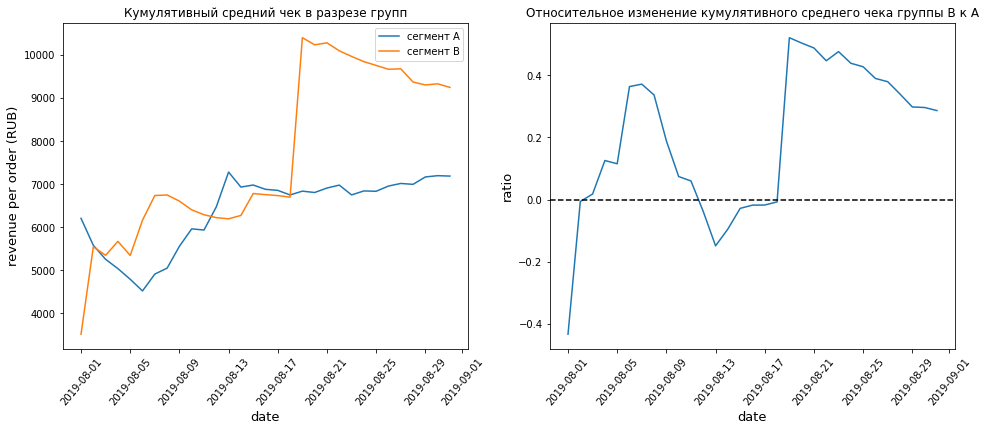

In [20]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b,how="left",left_on='date', right_on='date',suffixes = ['A','B'])
# зададим размеры сетки
plt.figure(figsize = (16,6))
# график кумулятивного среднего чека по группам
ax1=plt.subplot(1,2,1)
ax1 = plt.plot(cumulative_revenue_a['date'],(cumulative_revenue_a['revenue']/cumulative_revenue_a['orders']),label='сегмент A' )
plt.plot(cumulative_revenue_b['date'],(cumulative_revenue_b['revenue']/cumulative_revenue_b['orders']),label='сегмент B' )
plt.title('Кумулятивный средний чек в разрезе групп')
plt.xlabel('date',fontsize=13)
plt.ylabel('revenue per order (RUB)',fontsize=13)
plt.legend()
plt.xticks(rotation=50)

# cтроим отношение средних чеков
ax2 = plt.subplot(1,2,2)
ax2=plt.plot(merged_cumulative_revenue['date'],(merged_cumulative_revenue['revenueB']/ merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/ merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, linestyle='--', color='black')
plt.xticks(rotation=50)
plt.xlabel('date',fontsize=13)
plt.ylabel('ratio',fontsize=13)
plt.title('Относительное изменение кумулятивного среднего чека группы В к А')
plt.show()

В начале проведения теста средний чек сильно колеблется в обоих группах , после 17 августа его значение фиксируется. К концу теста средний чек группы В превышает средний чек группы А.

По графику кумулятивного среднего чека по группам также видны выбросы, искажающие результаты. Аномальный рост размера среднего чека сегмента В приходится на тот же временной период , что и аномальный рост кумулятивной выручки.

### Кумулятивная конверсия по группам

Построим график кумулятивной конверсии по группам и относительного изменения кумулятивной конверсии группы B к группе A.

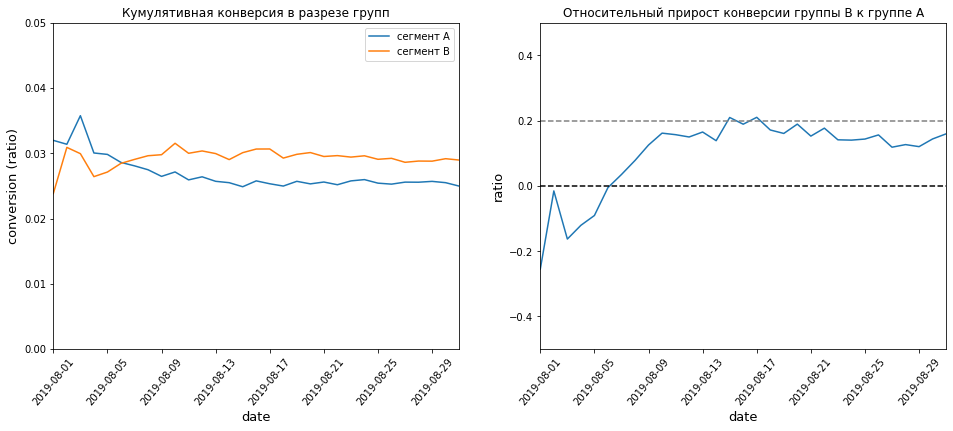

In [21]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']
# собираем данные в одном датафрейме
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],left_on='date', right_on = 'date',how='left',suffixes=['A', 'B'])
# строим графики
# размер сетки
plt.figure(figsize=(16,6))
# график кумулятивной конверсии по группам
ax1=plt.subplot(1,2,1)
ax1= plt.plot(cumulative_data_a['date'],cumulative_data_a['conversion'],label='сегмент A')
plt.plot(cumulative_data_b['date'],cumulative_data_b['conversion'],label='сегмент B')
plt.legend()
plt.title('Кумулятивная конверсия в разрезе групп')
plt.xlabel('date',fontsize=13)
plt.ylabel('conversion (ratio)',fontsize=13)
plt.xticks(rotation=50)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

# график относительного изменения кумулятивной конверсии группы B к группе A
ax2=plt.subplot(1,2,2)
ax2= plt.plot(merged_сumulative_сonversions['date'],merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1)#,label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительный прирост конверсии группы B к группе A')
plt.axhline(color='black',y=0,linestyle='--')
plt.axhline(color='grey',y=0.2,linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xticks(rotation=50)
plt.xlabel('date',fontsize=13)
plt.ylabel('ratio',fontsize=13)
plt.show()


Немного ранее середины теста конверсия установилась около своего среднего значения. В начале сегмент А имел большую конверсию , затем после 5 августа конверсия сегмента В выросла и зафиксировалась, в то время как конверсия сегмента А просела.


### Анализ выбросов : крайние значения данных

По кумулятивным графикам было видно влияние аномалий на показатели, что может привести к искажению результатов теста и сделать победителем неверную группу. 
Оценим количество заказов по пользователям на выбросы с помощью точечного графика.

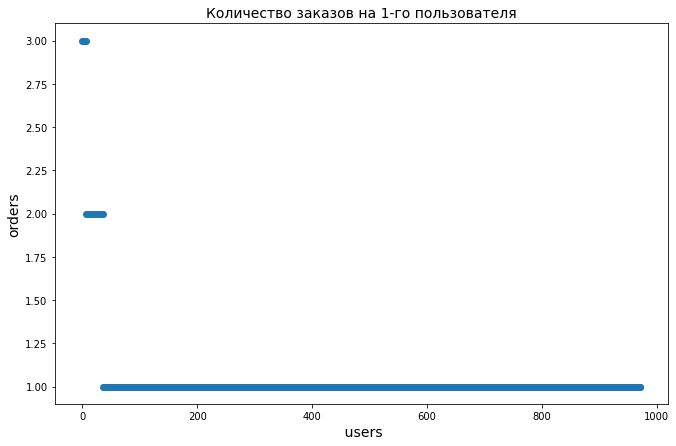

In [22]:
# сгруппируем заказы по пользователям с подсчетом количества заказов
orders_by_users = (
                orders.groupby('visitor_id', as_index=False)
                .agg({'transaction_id' : 'nunique'}) 
                )
orders_by_users.columns = ['visitor_id', 'orders']    
# отсортирует датафрейм по количеству заказов
orders_by_users = orders_by_users.sort_values(by='orders',ascending=False)
orders_by_users.head(10)
# точечный график
plt.figure(figsize=(11, 7))
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values,orders_by_users['orders'])
plt.title('Количество заказов на 1-го пользователя',fontsize=14)
plt.xlabel(' users',fontsize=14)
plt.ylabel('orders',fontsize=14)
plt.show()

Пользователей , сделавших два и более заказов, совсем мало. В основном, все пользователи оформляли по одному заказу за рассматриваемый период.

Определим границу аномальных заказов.

In [23]:
print ('95 перцентиль - ',np.percentile(orders_by_users['orders'],[95]))
print ('99 перцентиль - ',np.percentile(orders_by_users['orders'],[99]))

95 перцентиль -  [1.]
99 перцентиль -  [2.]


Только 5% пользователей оформили 2 заказа и 1% - 3 заказа. Так как количество заказов влияет на конверсию , разумно будет отсеять аномальных пользователей с количеством заказов более двух.

Оценим размер заказов на аномальность, построим точечный график стоимостей заказов и посчитаем 95,99 перцентили.

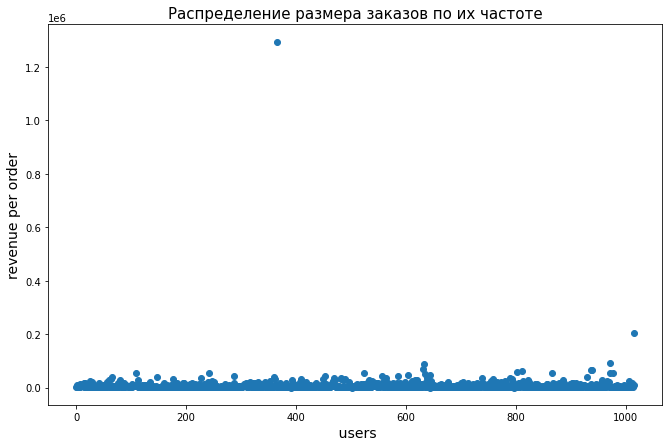

95 перцентиль -  [26785.]
99 перцентиль -  [53904.]


In [24]:
# точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(11, 7))
plt.scatter(x_values,orders['revenue'])
plt.title('Распределение размера заказов по их частоте',fontsize=15)
plt.xlabel(' users',fontsize=14)
plt.ylabel('revenue per order',fontsize=14)
plt.show()
print ('95 перцентиль - ',np.percentile(orders['revenue'],[95]))
print ('99 перцентиль - ',np.percentile(orders['revenue'],[99]))

По графику видно , что есть несколько дорогих заказов . 5 % пользователей оформили заказы на сумму свыше 26,8 тыс.руб. и только 1% пользователей имеет заказы свыше 53,9 тыс.руб.

Установим  границу для отсеивания аномальных значений стоимостей заказов на уровне 95 перцентиля. 

### Анализ статистической значимоси различий показателей по неочищенным данным.

Посчитаем статистическую значимость различий в конверсии  между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы.

Нулевая: различий в конверсии  между группами нет. 

Альтернативная: различия в конверсии  между группами есть.

Уровень статистической значимости установим в 5%.

In [25]:
# фильтруем дату и количество посетителей для гр А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
# фильтруем дату и количество посетителей для гр B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# создаем единый датасет 
data = visitors_a_daily.merge(visitors_b_daily, left_on='date', right_on='date', how='left')
display(data.head(5))

# таблица для пользователей гр А, совершивших хотя бы 1 заказ,  указано число заказов.
orders_by_users_a = (
                    orders.query('group=="A"')
                    .groupby('visitor_id',as_index=False)
                    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']
# таблица для пользователей гр B, совершивших хотя бы 1 заказ,  указано число заказов.
orders_by_users_b = (
                    orders.query('group=="B"')
                    .groupby('visitor_id',as_index=False)
                    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']
# таблица с заказами по  пользователям  и нулями для пользователей не совершивших заказ
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

# применим тест Манна Уитни для нахождения статистической значимости различия конверсий
alpha = 0.05
pvalue = st.mannwhitneyu(sample_a,sample_b)[1]
print('p_value',"{0:.3f}".format(pvalue))

# Относительный прирост конверсии B к среднему чеку А
print('Относительное различие конверсии B к А',"{0:.3f}".format(sample_b.mean()/sample_a.mean()-1))

# сравним  получившееся p-значение с заданным уровнем статистической значимости

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

,date,visitors_per_date_a,visitors_per_date_b
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


p_value 0.011
Относительное различие конверсии B к А 0.160
Отвергаем нулевую гипотезу


Анализ данных без удаления аномалий показывает, что есть статистически значимые расхождения в конверсиях двух групп(Аи В).Относительный прирост конверсии группы B к конверсии группы А равен 16%.

Посчитаем статистическую значимость различий в  среднем чеке между группами по «сырым» данным .

Сформулируем гипотезы.

Нулевая: различий в среднем чеке между группами нет. 

Альтернативная: различия в среднем чеке между группами есть.

Уровень статистической значимости установим в 5%.

In [26]:
# применим тест Манна Уитни для нахождения статистической значимости различия средних чеков А и В
alpha = 0.05

pvalue = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('p_value','{0:.3f}'.format(pvalue))

# Относительный прирост среднего чека B к среднему чеку А
print('Относительное различие среднего чека B к А','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

# сравним  получившееся p-значение с заданным уровнем статистической значимости
if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value 0.829
Относительное различие среднего чека B к А 0.287
Не получилось отвергнуть нулевую гипотезу


P_value больше 0.05. Статистически значимых различий между средними чеками двух групп не обнаружено, несмотря на относительную разность показателя группы В к группе А в 28%.   

### Анализ статистической значимоси различий показателей по очищенным данным.

Приступим к очистке данных от аномалий и расчету статистической значимости различий показателей конверсии и среднего чека по очищенным данным.

Отсеим 1% пользователей, оформивших более 2 заказов и до 5%процентов пользователей, чьи заказы были на сумму от 26785 и выше. 

In [27]:
# пользователи с числом заказов более 2
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
# пользователи с аномально дорогими заказами
users_with_expensive_orders = orders[orders['revenue'] >= 26785]['visitor_id']
# объединенный список пользовтелей для исключения
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head(5)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64

 Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей.
 
 Сформулируем гипотезы.

Нулевая: различий в конверсии по очищеным данным между группами нет. 

Альтернативная: различия в конверсии по очищеным данным между группами есть.

Уровень статистической значимости установим в 5%.

In [28]:
# данные по группе А без аномалий
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# данные по группе В без аномалий
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
# применим тест Манна Уитни для нахождения статистической значимости различия конверсий А и В
alpha = 0.05

pvalue = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print('p_value','{0:.5f}'.format(pvalue))
# Относительный прирост конверсий очищенных данных
print('Относительное различие конверсии B к А','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

# сравним  получившееся p-значение с заданным уровнем статистической значимости
if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value 0.01235
Относительное различие конверсии B к А 0.182
Отвергаем нулевую гипотезу


Как и в случае анализа по сырым данным статистическая значимость достигнута, чтобы сказать что конверсия двух групп имеет расхождения.

Конверсия сегмента В на 18% лучше конверсии сегмента А, что на 2 процентных пункта выше, чем по сырым данным.

 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

 
   Сформулируем гипотезы.

Нулевая: различий в  среднем чеке заказа по очищеным данным между группами нет. 

Альтернативная: различия в среднем чеке заказа по очищеным данным между группами есть.

Уровень статистической значимости установим в 5%.

In [29]:
# применим тест Манна Уитни для нахождения статистической значимости различия средних чеков А и В
alpha = 0.05
pvalue =  st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],)[1]
print('p_value','{0:.3f}'.format(pvalue))                   
# Относительный прирост средних чеков В к А по  очищенным данным
print('Относительное различие среднего чека B к А',
    "{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
        - 1
    )
)   
# сравним  получившееся p-значение с заданным уровнем статистической значимости
if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value 0.646
Относительное различие среднего чека B к А -0.048
Не получилось отвергнуть нулевую гипотезу


После очистки данных от выбросов статистических расхождений между средними чеками двух групп не обнаружено. После удаления выбросов относительное различие среднего чека группы B к А снизилось с 28% до 5% в пользу показателя группы А.
Это говорит о том, что основные выбросы были в группе В.

## Выводы

Цель проводимого исследования - проанализировать результаты A/B-тест и принять решения об остановке теста или дальнейшем его продолжении.

В ходе исследования была проведена предобработка данных, скорректированны используемые типы данных,проведены промежуточные расчеты,что позволило провести приоритизацию гипотез и анализ A/B-теста.

В ходе анализа было установлено, что :

1. В изначальных данных содержались аномальные по своей величине заказы пользователей и пользователи с выбивающимся количеством заказов.

Данные выбросы влияли на оценку результатов сегментов А и В. Так по графику кумулятивного среднего чека была видна значительная разница между средним чеком сегмента B и  средним чеком сегмента А, которая сформировалась за счет аномально дорогих заказов пользователей группы B. 


2. Существует проблема деления трафика.

В данных были пользователи, попавшие сразу в две тестируемые группы.  А значит по этим пользователям было невозможно определить, что именно повлияло на их решения и единственным выходом было удаление данных пользователей из датасета.Если бы таких пользователей было бы достаточное количество , то после их удаления могла возникнуть проблема недостаточности данных для анализа. Поэтому так важно уделить в будущем внимание  устранению данной проблемы.


3. Тест можно остановить , зафиксировав победу сегмента В.

Проверка с помощью непараметрического теста Манна-Уитни  показала,что :
 - Есть статистически значимое различие в конверсии между группами как по сырым данным, так и после фильтрации аномалий. После удаления выбросов конверсия сегмента В выше конверсии сегмента А на 18 процентных пункта.
 
 
 - Как по сырым данным, так и после фильтрации аномалий нет статистически значимого различия по среднему чеку между группами. После удаление выбросов относительная разница между средними чеками двух групп составила 4,8% в пользу сегмента А.
 
 
  Несмотря на то,что статистическая значимость различий в среднем чеке не достигнута, можно остановить А/В-тест. Так как по кумулятивным графикам видно, что показатели выручки, среднего чека и конверсии уже зафиксировались возле своих средних значений , перестав сильно колебаться как в начале теста . И смысла продолжать тест нет: лучше группы A группа B в части среднего чека уже не станет. 
 
 
   По результатм А/В-тест зафикируем победу сегмента B, так как конверсия сегмента B статистически значимо лучше конверсии сегмента А , а средний чек сегмента B не меньше среднего чека сегмента А.
   
  